# Considerações:
- Exemplo usando LangChain utilizando template de prompt

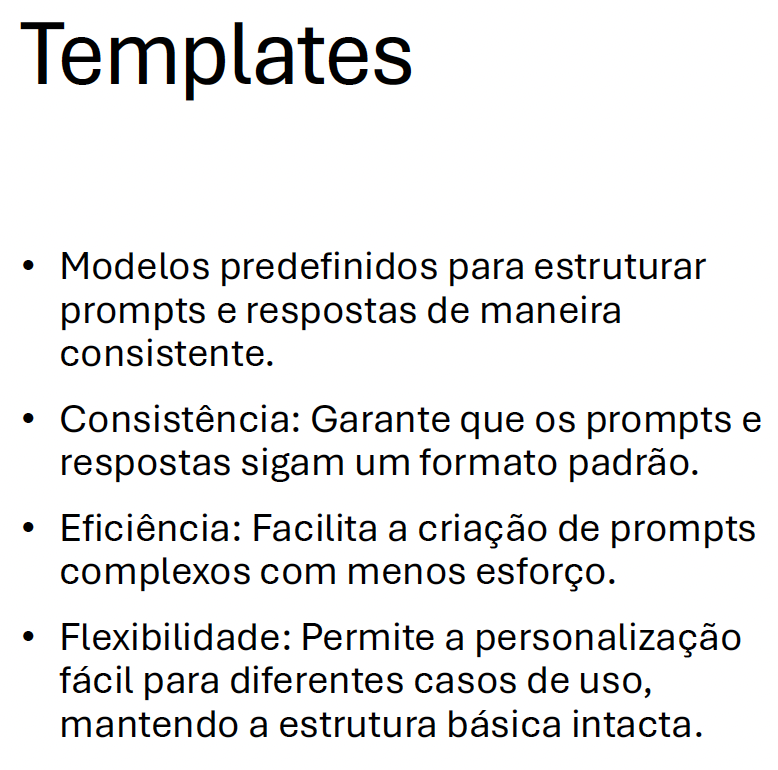

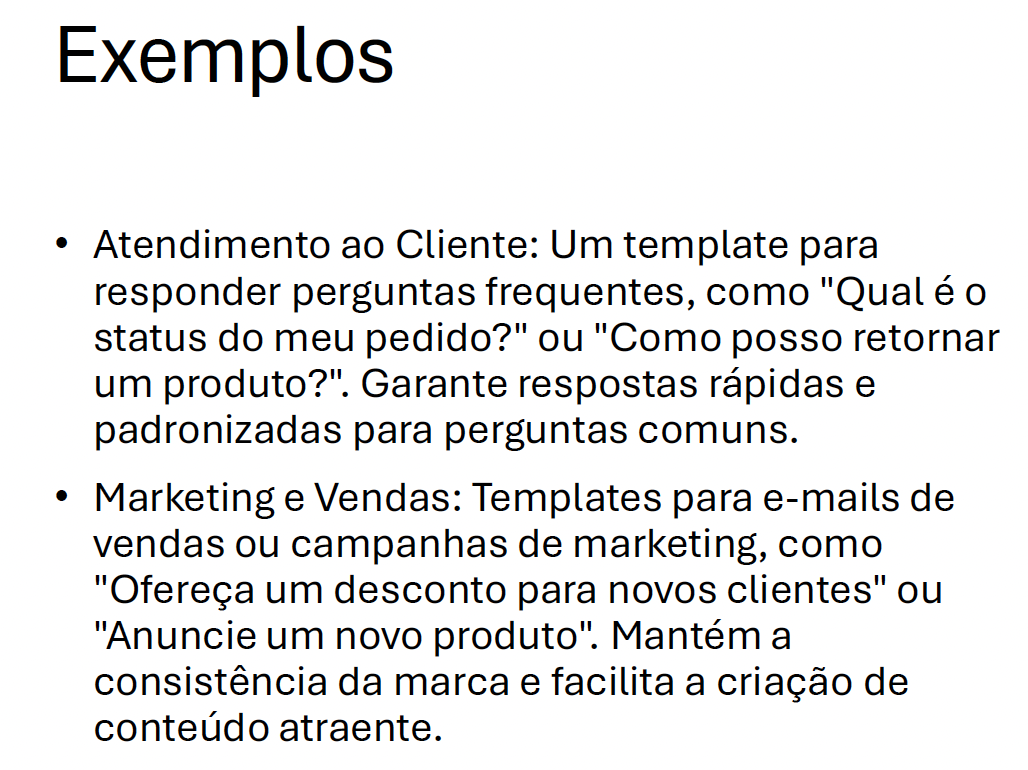

# Setup

In [2]:
# importando as bibliotecas

from langchain_openai import ChatOpenAI,OpenAI
from langchain.prompts import PromptTemplate,ChatPromptTemplate, HumanMessagePromptTemplate # imports para uso do template
from langchain_core.messages import SystemMessage, HumanMessage, AIMessage # usados no modelo de chat para o template
import os
import yaml

In [3]:
# lendo o arquivo config.yaml para ter acesso a chave de acesso da OpenAI

with open('config.yaml', 'r') as config_file:
    config = yaml.safe_load(config_file)
os.environ['OPENAI_API_KEY'] = config['OPENAI_API_KEY']

# Completion

In [4]:
# Template de exemplo: prompt que será enviado ao modelo e os valores entre {} serão substituidos por dados, por exemplo, 
# que o usuário indicou em formulário, vindo de api etc.

template = '''
Você é um analista financeiro.
Escreva um relatório financeiro detalhado para a empresa "{empresa}" para o período {periodo}.

O relatório deve ser escrito em {idioma} e incluir as seguintes análises:
{analises}

Certifique-se de fornecer insights e conclusões para cada seção.
'''

In [6]:
prompt_template = PromptTemplate.from_template(template=template) # instanciando o objeto PromptTemplate

In [7]:
# Definindo as variáveis que serão usadas no prompt

empresa = 'ACME Corp'
periodo = 'Q1 2024'
idioma = 'Português'
analises = [
    "Análise do Balanço Patrimonial",
    "Análise do Fluxo de Caixa",
    "Análise de Tendências",
    "Análise de Receita e Lucro",
    "Análise de Posição de Mercado"
]

In [8]:
# Tratando a lista de análises para passar para o prompt em forma de texto
# o join auxilia para transformar a lista em um texto com quebra de linha

analises_text = "\n".join([f"- {analise}" for analise in analises])

print(analises_text) # conferindo o texto após pré processamento acima

- Análise do Balanço Patrimonial
- Análise do Fluxo de Caixa
- Análise de Tendências
- Análise de Receita e Lucro
- Análise de Posição de Mercado


In [9]:
# Estruturando o prompt com as variáveis a serem completados

prompt = prompt_template.format( # instancia do objeto PromptTemplate
    empresa=empresa,
    periodo=periodo,
    idioma=idioma,
    analises=analises_text
)
print("Prompt Gerado:\n", prompt) # imprimindo o prompt

Prompt Gerado:
 
Você é um analista financeiro.
Escreva um relatório financeiro detalhado para a empresa "ACME Corp" para o período Q1 2024.

O relatório deve ser escrito em Português e incluir as seguintes análises:
- Análise do Balanço Patrimonial
- Análise do Fluxo de Caixa
- Análise de Tendências
- Análise de Receita e Lucro
- Análise de Posição de Mercado

Certifique-se de fornecer insights e conclusões para cada seção.



In [10]:
# Fazendo o chamado na api do OpenAI

openai = OpenAI(model_name='gpt-3.5-turbo-instruct',max_tokens=2000) #max 4096

response = openai.invoke(prompt) # através do objeto instanciado openai e chamando o método 'invoke' passando como a 'prompt' indicada

In [11]:
print("Saída do LLM:\n", response) # Imprimindo a resposta

Saída do LLM:
 
Relatório Financeiro - ACME Corp, Q1 2024

Análise do Balanço Patrimonial:
O balanço patrimonial da ACME Corp para o primeiro trimestre de 2024 mostra um ativo total de R$ 500.000,00, com um passivo total de R$ 300.000,00 e um patrimônio líquido de R$ 200.000,00. Isso indica que a empresa possui uma boa solidez financeira, com um patrimônio líquido que representa 40% do ativo total.

No entanto, é importante notar que o passivo total aumentou em relação ao trimestre anterior, o que pode indicar um aumento nas dívidas da empresa. Isso deve ser monitorado de perto para garantir que a empresa não fique sobrecarregada com dívidas.

Análise do Fluxo de Caixa:
A análise do fluxo de caixa mostra que a ACME Corp gerou um fluxo de caixa operacional positivo de R$ 50.000,00 durante o primeiro trimestre de 2024. Isso indica que a empresa está gerando receitas suficientes para cobrir suas despesas operacionais.

No entanto, o fluxo de caixa livre foi negativo em R$ 20.000,00, o que

# Chat

In [13]:
# Estruturando o prompt para o Chat
# Equivalência aos roles: SystemMessage: system, Human: user, AI: assistant
# HumanMessagePromptTemplate: uso quando tenho um template, ou seja, um valor que será substituido no prompt do contrário,
# pode ser usado o HumanMessage. Ambos são equivalentes a user no caso de roles.

chat_template = ChatPromptTemplate.from_messages(
    [
        SystemMessage(content='Você deve estruturar suas respostas de acordo com o método de análise de negócios, garantindo clareza e concisão.'),
        HumanMessagePromptTemplate.from_template('Por favor, gere um relatório detalhado sobre a indústria de tecnologia na região "{regiao}".'),
        AIMessage(content='Claro, vou começar coletando informações sobre a região e analisando os dados disponíveis.'),
        HumanMessage(content='Certifique-se de incluir uma análise SWOT e uma previsão de crescimento para os próximos 5 anos.'),
        AIMessage(content='Entendido. Aqui está o relatório completo:')
    ]
)

In [14]:
# com o format_messages substituir o valor de regiao

prompt_gerado = chat_template.format_messages(regiao='América Latina')
print(prompt_gerado)  

[SystemMessage(content='Você deve estruturar suas respostas de acordo com o método de análise de negócios, garantindo clareza e concisão.'), HumanMessage(content='Por favor, gere um relatório detalhado sobre a indústria de tecnologia na região "América Latina".'), AIMessage(content='Claro, vou começar coletando informações sobre a região e analisando os dados disponíveis.'), HumanMessage(content='Certifique-se de incluir uma análise SWOT e uma previsão de crescimento para os próximos 5 anos.'), AIMessage(content='Entendido. Aqui está o relatório completo:')]


In [15]:
# Fazendo o chamado na api do OpenAI

openai = ChatOpenAI(model_name='gpt-3.5-turbo')
response = openai.invoke(prompt_gerado)

In [16]:
print("Saída do LLM:\n", response.content) # Imprimindo a resposta

Saída do LLM:
 **Relatório da Indústria de Tecnologia na América Latina**

**Introdução:**
A América Latina é uma região em crescimento no setor de tecnologia, impulsionada por diversos fatores como o aumento da conectividade, o crescimento da população digital e o interesse crescente em inovação tecnológica.

**Análise SWOT:**

- **Forças (Strengths):**
1. Crescimento da população digital: A região tem experimentado um aumento significativo no número de usuários de internet e dispositivos móveis, o que impulsiona a demanda por serviços e produtos tecnológicos.
2. Ecossistema empreendedor em desenvolvimento: Há um aumento de startups de tecnologia na região, com potencial de inovação e crescimento.
3. Investimentos em infraestrutura: Alguns países têm investido em infraestrutura de tecnologia, como redes 5G e data centers, para suportar o crescimento do setor.

- **Fraquezas (Weaknesses):**
1. Desigualdade digital: Acesso desigual à tecnologia e internet em diferentes países e regiões 